<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.616874,55.135879,54.035797,-247.418763,-65.630213,174.081633,-239.711846
1,0.0,1.0,42.701421,79.516244,37.833548,240.819893,410.871107,143.466652,267.404455
2,0.0,2.0,38.769487,71.185463,31.246058,58.946040,210.147048,116.440943,93.706105
3,0.0,3.0,84.417542,56.423741,55.718684,-209.378521,-2.818555,191.463233,-194.281787
4,0.0,4.0,35.216404,62.964823,99.283551,364.442837,571.907615,284.701847,287.205768
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.728137,52.264109,70.242367,171.474095,399.708708,237.197219,162.511489
119996,999.0,116.0,87.853631,49.465225,67.493087,-3.609876,211.202067,222.082627,-10.880560
119997,999.0,117.0,58.198367,33.162426,37.849899,-132.420327,6.790365,95.261694,-88.471330
119998,999.0,118.0,43.863691,90.991488,70.971869,939.269441,1155.096488,259.037397,896.059091


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e            Y  \
rep   index                                                             
0.0   0.0    62.616874  55.135879  54.035797 -247.418763   -65.630213   
      1.0    42.701421  79.516244  37.833548  240.819893   410.871107   
      2.0    38.769487  71.185463  31.246058   58.946040   210.147048   
      3.0    84.417542  56.423741  55.718684 -209.378521    -2.818555   
      4.0    35.216404  62.964823  99.283551  364.442837   571.907615   
...                ...        ...        ...         ...          ...   
999.0 115.0  95.728137  52.264109  70.242367  171.474095   399.708708   
      116.0  87.853631  49.465225  67.493087   -3.609876   211.202067   
      117.0  58.198367  33.162426  37.849899 -132.420327     6.790365   
      118.0  43.863691  90.991488  70.971869  939.269441  1155.096488   
      119.0  49.278349  82.395453  45.521067 -231.674562   -44.479693   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.081633 -239.711846  
      1.0    143.466652  267.404455  
      2.0    116.440943   93.706105  
      3.0    191.463233 -194.281787  
      4.0    284.701847  287.205768  
...                 ...         ...  
999.0 115.0  237.197219  162.511489  
      116.0  222.082627  -10.880560  
      117.0   95.261694  -88.471330  
      118.0  259.037397  896.059091  
      119.0  167.927400 -212.407093  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e            Y  \
rep   index                                                             
0.0   0.0    62.616874  55.135879  54.035797 -247.418763   -65.630213   
      1.0    42.701421  79.516244  37.833548  240.819893   410.871107   
      2.0    38.769487  71.185463  31.246058   58.946040   210.147048   
      3.0    84.417542  56.423741  55.718684 -209.378521    -2.818555   
      4.0    35.216404  62.964823  99.283551  364.442837   571.907615   
...                ...        ...        ...         ...          ...   
999.0 115.0  95.728137  52.264109  70.242367  171.474095   399.708708   
      116.0  87.853631  49.465225  67.493087   -3.609876   211.202067   
      117.0  58.198367  33.162426  37.849899 -132.420327     6.790365   
      118.0  43.863691  90.991488  70.971869  939.269441  1155.096488   
      119.0  49.278349  82.395453  45.521067 -231.674562   -44.479693   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.081633 -239.711846  
      1.0    143.466652  267.404455  
      2.0    116.440943   93.706105  
      3.0    191.463233 -194.281787  
      4.0    284.701847  287.205768  
...                 ...         ...  
999.0 115.0  237.197219  162.511489  
      116.0  222.082627  -10.880560  
      117.0   95.261694  -88.471330  
      118.0  259.037397  896.059091  
      119.0  167.927400 -212.407093  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.616874,55.135879,54.035797,-247.418763,-65.630213,174.081633,-239.711846
1,0.0,1.0,42.701421,79.516244,37.833548,240.819893,410.871107,143.466652,267.404455
2,0.0,2.0,38.769487,71.185463,31.246058,58.946040,210.147048,116.440943,93.706105
3,0.0,3.0,84.417542,56.423741,55.718684,-209.378521,-2.818555,191.463233,-194.281787
4,0.0,4.0,35.216404,62.964823,99.283551,364.442837,571.907615,284.701847,287.205768
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.728137,52.264109,70.242367,171.474095,399.708708,237.197219,162.511489
119996,999.0,116.0,87.853631,49.465225,67.493087,-3.609876,211.202067,222.082627,-10.880560
119997,999.0,117.0,58.198367,33.162426,37.849899,-132.420327,6.790365,95.261694,-88.471330
119998,999.0,118.0,43.863691,90.991488,70.971869,939.269441,1155.096488,259.037397,896.059091


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e            Y  \
rep   index                                                             
0.0   0.0    62.616874  55.135879  54.035797 -247.418763   -65.630213   
      1.0    42.701421  79.516244  37.833548  240.819893   410.871107   
      2.0    38.769487  71.185463  31.246058   58.946040   210.147048   
      3.0    84.417542  56.423741  55.718684 -209.378521    -2.818555   
      4.0    35.216404  62.964823  99.283551  364.442837   571.907615   
...                ...        ...        ...         ...          ...   
999.0 115.0  95.728137  52.264109  70.242367  171.474095   399.708708   
      116.0  87.853631  49.465225  67.493087   -3.609876   211.202067   
      117.0  58.198367  33.162426  37.849899 -132.420327     6.790365   
      118.0  43.863691  90.991488  70.971869  939.269441  1155.096488   
      119.0  49.278349  82.395453  45.521067 -231.674562   -44.479693   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.081633 -239.711846  
      1.0    143.466652  267.404455  
      2.0    116.440943   93.706105  
      3.0    191.463233 -194.281787  
      4.0    284.701847  287.205768  
...                 ...         ...  
999.0 115.0  237.197219  162.511489  
      116.0  222.082627  -10.880560  
      117.0   95.261694  -88.471330  
      118.0  259.037397  896.059091  
      119.0  167.927400 -212.407093  

[120000 rows x 7 columns]

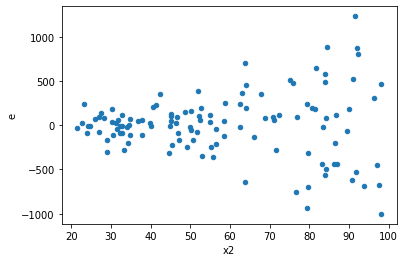

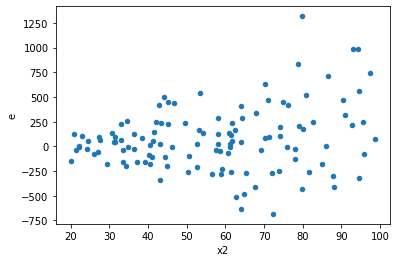

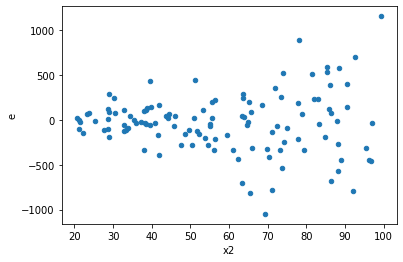

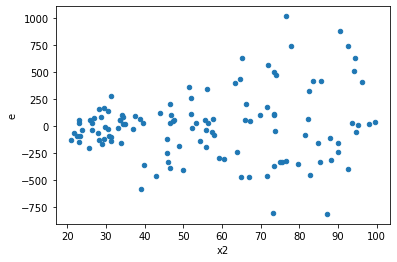

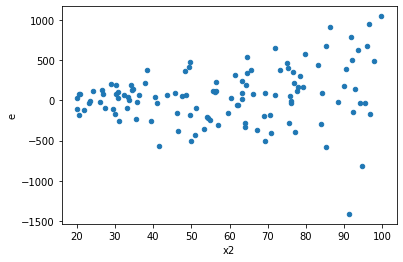

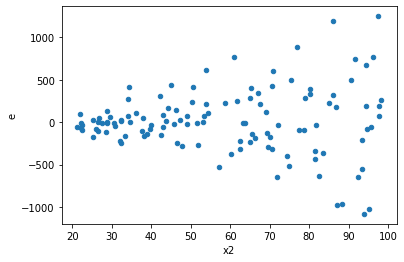

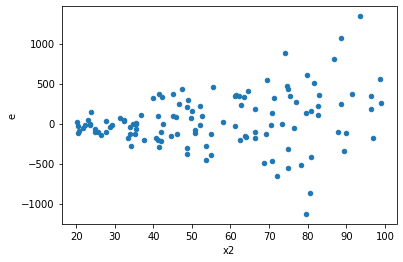

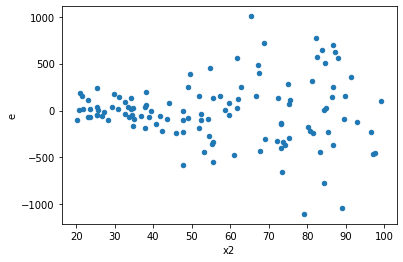

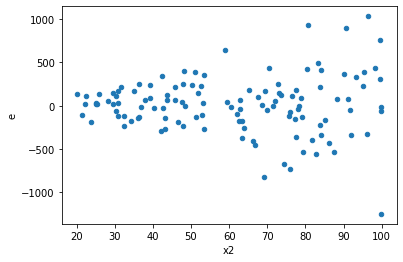

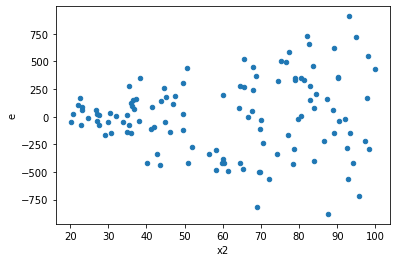

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,67.0,47.0,2520469.283068793,12162429.621881206,37618.94452341482,258775.098337898,6.878850579575165,1.8854939831669526e-10,0.9999999999057253,9.427469915834763e-11,Reject001=0 : Heteroscedasticity
1.0,52.0,62.0,4795966.434206266,6347262.002537285,92230.12373473588,102375.19358931105,1.1099973570864279,0.6898906091620525,0.6550546954189738,0.34494530458102624,Reject001=1 : Homoscedasticity
5.0,60.0,54.0,2349150.1943036797,15043828.213909687,39152.50323839466,278589.41136869794,7.115494242409026,1.2249312675294277e-11,0.9999999999938753,6.1246563376471386e-12,Reject001=0 : Heteroscedasticity
7.0,55.0,59.0,1664555.5693464738,11399544.94328357,30264.646715390434,193212.62615734866,6.384103141012201,3.8865577423052855e-11,0.9999999999805672,1.9432788711526428e-11,Reject001=0 : Heteroscedasticity
9.0,62.0,52.0,5025988.676567126,6922321.1148284925,81064.33349301816,133121.55990054793,1.6421717685745645,0.06772123233220428,0.9661393838338979,0.03386061616610214,Reject001=1 : Homoscedasticity
10.0,56.0,58.0,5555861.846078508,10997216.823046517,99211.81867997335,189607.18660425028,1.911135075709724,0.015552224455373853,0.9922238877723131,0.0077761122276869266,Reject001=1 : Homoscedasticity
11.0,72.0,42.0,10660154.49502849,7697458.50003048,148057.70131984015,183272.82142929715,1.237847270324587,0.45832863686967173,0.7708356815651641,0.22916431843483587,Reject001=1 : Homoscedasticity
13.0,66.0,48.0,2467099.0205755206,9500487.231813546,37380.28819053819,197926.81732944888,5.294951615154982,1.5872151370999177e-08,0.9999999920639243,7.936075685499588e-09,Reject001=0 : Heteroscedasticity
14.0,61.0,53.0,3357492.124139236,9881666.430287726,55040.854494085834,186446.53642052313,3.3874208192126978,1.1850768642407417e-05,0.9999940746156788,5.925384321203708e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,67.0,47.0,2520469.283068793,12162429.621881206,37618.94452341482,258775.098337898,6.878850579575165,1.8854939831669526e-10,Reject001=0 : Heteroscedasticity
1.0,52.0,62.0,4795966.434206266,6347262.002537285,92230.12373473588,102375.19358931105,1.1099973570864279,0.6898906091620525,Reject001=1 : Homoscedasticity
2.0,49.0,65.0,6762461.783655282,6151689.898369907,138009.42415623023,94641.38305184474,0.6857602923167642,0.16913779280100014,Reject001=1 : Homoscedasticity
3.0,50.0,64.0,8705614.136318792,2442515.0767751834,174112.28272637582,38164.29807461224,0.21919360011257166,1.3827777704909925e-07,Reject001=0 : Heteroscedasticity
4.0,46.0,68.0,7407173.945849609,6075826.668140564,161025.520561948,89350.3921785377,0.5548834238617709,0.035690356417030854,Reject001=1 : Homoscedasticity
5.0,60.0,54.0,2349150.1943036797,15043828.213909687,39152.50323839466,278589.41136869794,7.115494242409026,1.2249312675294277e-11,Reject001=0 : Heteroscedasticity
6.0,59.0,55.0,6951476.410752473,5830732.25963724,117821.6340805504,106013.3138115862,0.8997779961115521,0.6892083196092158,Reject001=1 : Homoscedasticity
7.0,55.0,59.0,1664555.5693464738,11399544.94328357,30264.646715390434,193212.62615734866,6.384103141012201,3.8865577423052855e-11,Reject001=0 : Heteroscedasticity
8.0,57.0,57.0,7590976.402678794,4942437.416488953,133175.0246083999,86709.42835945531,0.6510937663756676,0.10813372040301726,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      529
Reject001=0 : Heteroscedasticity    471
Name: Result_test, dtype: int64